In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataset import get_manchester

In [2]:
def morista(a, b, randomize=False):
    if randomize:
        b.index = np.random.permutation(b.index)
    a, b = a.align(b, fill_value=0)
    numer = np.dot(a, b)
    denom = np.square(a).sum() + np.square(b).sum()
    return 2 * numer / denom

In [3]:
def morista_child_adult(df):
    child = df[df.speaker.eq('CHI')].ngram.value_counts()
    adult = df[df.speaker.eq('MOT')].ngram.value_counts()
    return morista(child, adult)

In [24]:
def per_session_plot(title):
    plt.grid()
    plt.xticks(np.arange(1,35))
    plt.title(title)
    plt.legend()
    plt.show()

# Quick Test 

Testing example from "Testing for Significance of Morisita's, Horn's and Related Measures of Overlap"

The morista calculation for X and Y should be 0.83

In [8]:
x = pd.Series([.2, .3, .5])
y = pd.Series([.1, .6, .3])
morista(x, y)

0.83333333333333326

In [ ]:
source = get_manchester("/home/paul/corpora/Manchester/**/*", cached=False, gram_sizes=[1])
unigrams = source[0]

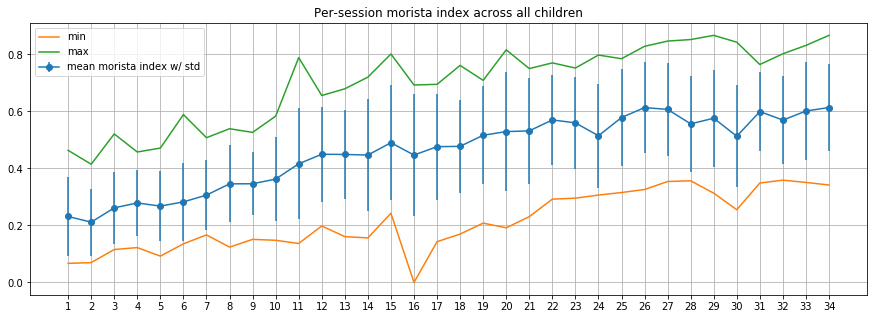

In [138]:
plt.rcParams['figure.figsize'] = 15, 5

groups = unigrams.groupby(['corpus', 'session']).apply(morista_child_adult)
stats = groups.groupby(level='session').describe()
plt.errorbar(stats.index, stats['mean'], stats['std'], label='mean morista index w/ std', marker='o');
plt.plot(stats.index, stats['min'])
plt.plot(stats.index, stats['max'])
per_session_plot('Per-session morista index across all children')

In [96]:

from random import sample
children = sample(list(unigrams.corpus.unique()), 5)

In [140]:
def plot_child(name):
    m = unigrams[unigrams.corpus.eq(name)].groupby(['session']).apply(morista_child_adult)
    m = m.align(pd.Series(index=np.arange(1, 35)))[0]
#    plt.errorbar(stats.index, stats['mean'], stats['std'], label='mean morista index w/ std', marker='o');
    plt.plot(stats.index, m, label='morista index')
    per_session_plot(name)

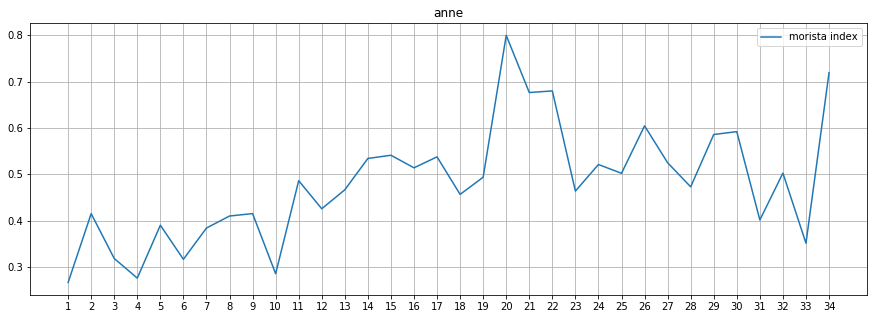

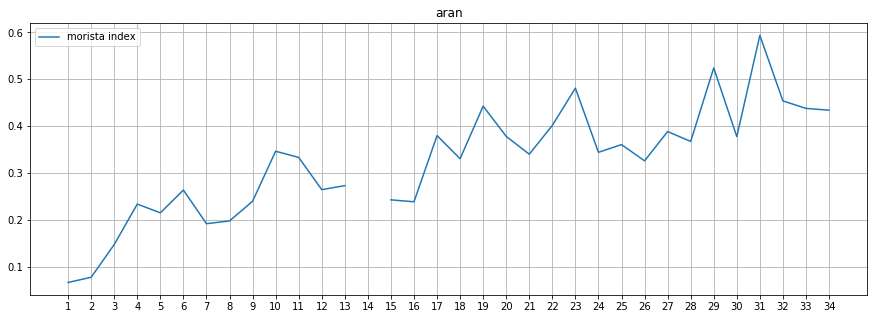

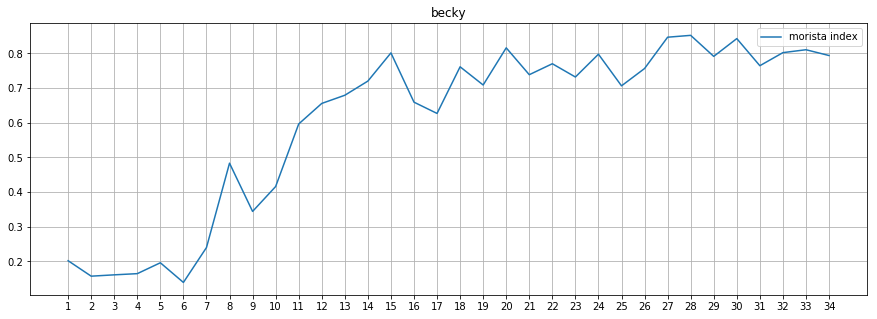

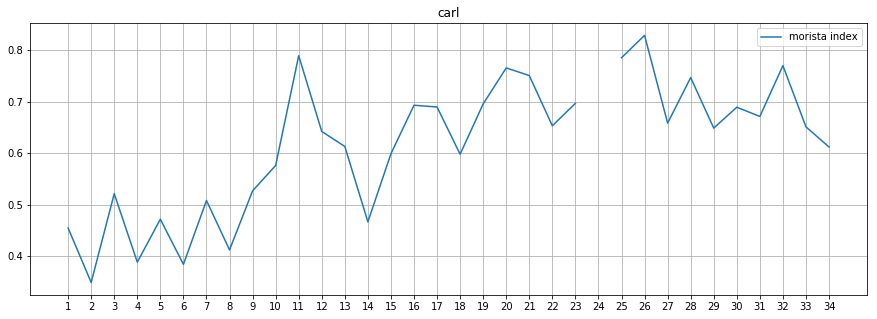

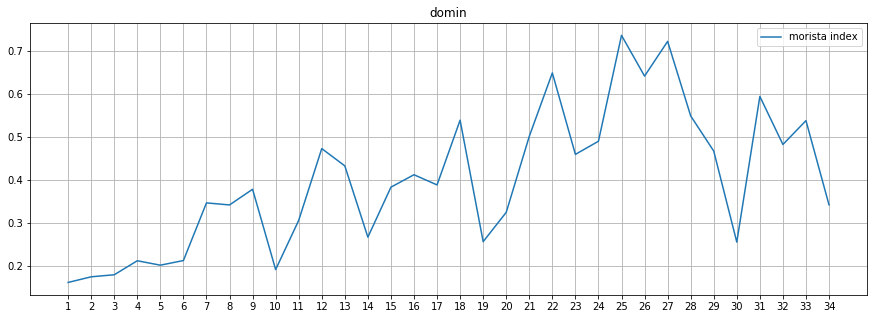

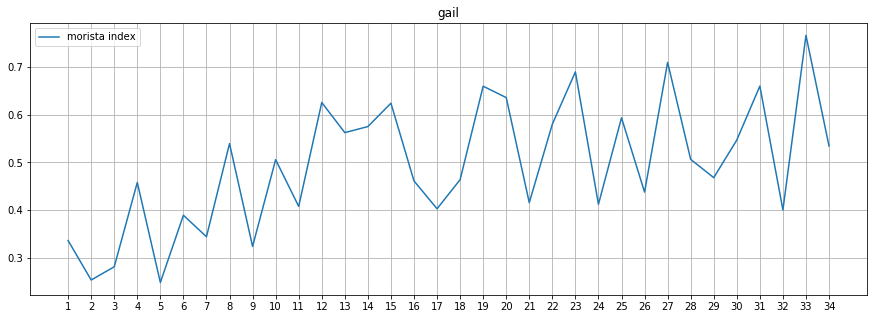

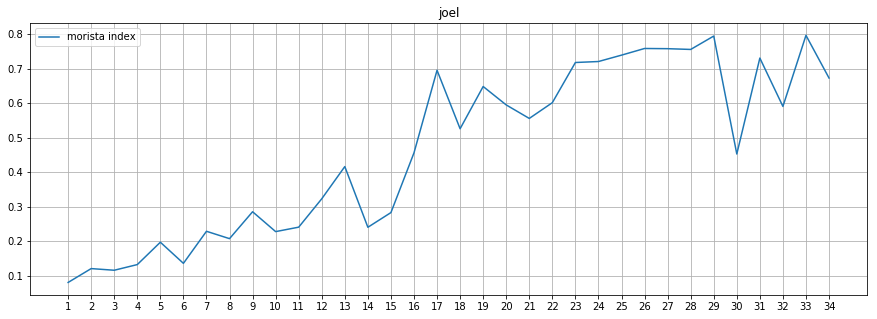

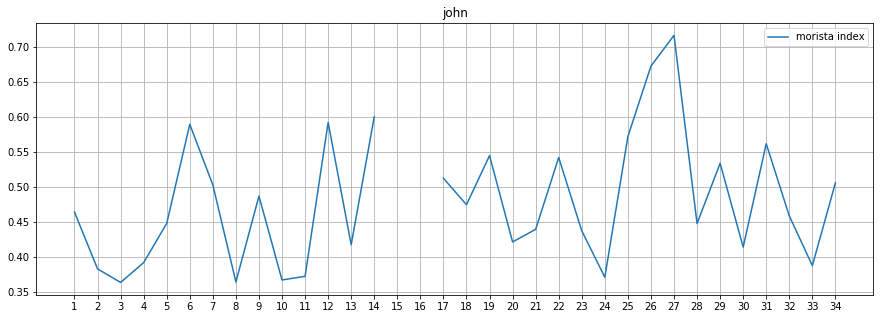

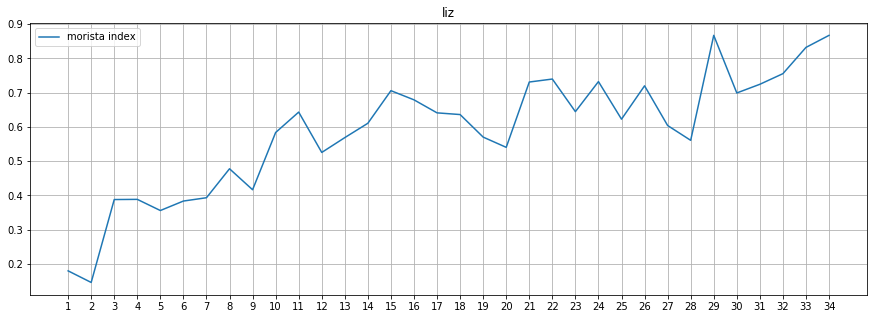

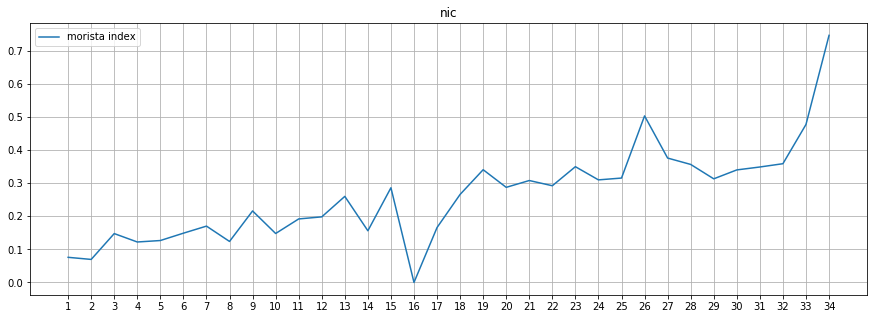

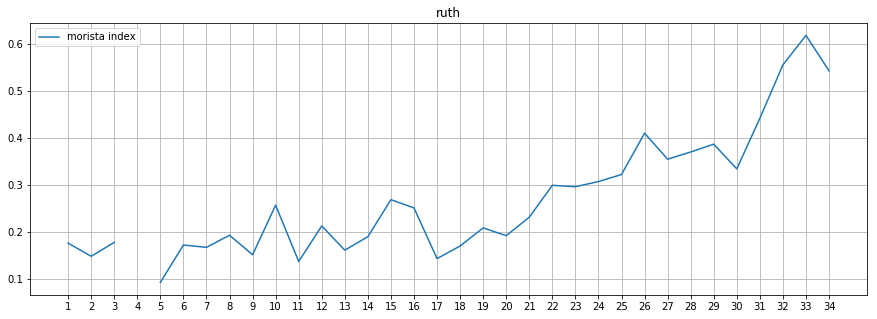

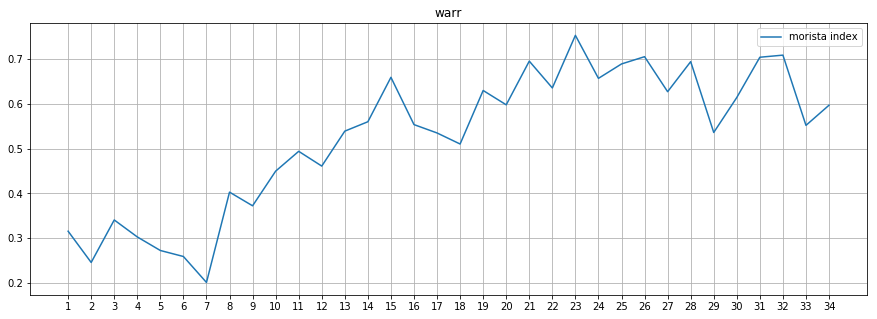

In [141]:
for child in unigrams.corpus.unique():
    try:
        plot_child(child)
    except Exception as e:
        print('error with {}'.format(child), e)